# Programming Exercise 3: Multi-class Classification and Neural Networks

```
by Seokkyu Kong
Date: 2016-03-19
Summary: Coursera machine learning (Prof. Andrew Ng) 강의 내용과 assignment는 octave(matlab)으로 이루어진다. 
해당 코드를 python으로 구현해본다.

Andrew Ng 교수의 강의: https://www.coursera.org/learn/machine-learning/
```

Numpy 와 MATLAB 참고 자료

- [Numpy for Matlab users #1](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)
- [NumPy for MATLAB users #2](http://mathesaurus.sourceforge.net/matlab-numpy.html)



## Introduction



이 연습문제에서는 **필기체 숫자 인식을 위한 one-vs-all logistic regression과 뉴럴 네트워크를** 구현할 것이다. 프로그래밍 연습문제를 시작하기 전에, 강의 비디오를 보고 관련 토픽에 대한 리뷰 문제를 완성할 것을 강력히 권장한다.

### Files included in this exercise

* lrCostFunction.m - Logistic regression cost function
* oneVsAll.m - Train a one-vs-all multi-class classifier
* predictOneVsAll.m - Predict using a one-vs-all multi-class classifier 
* predict.m - Neural network prediction function

연습문제를 통해서, 스크립트 ex3.m과 ex3_nn.m을 사용하게 된다. 이들 스크립트는 문제에 대한 데이터셋을 설정하고 당신이 작성한 함수를 호출한다. 당신은 이들 스크립트를 수정할 필요는 없다. 단지 다른 파일에 있는 함수들을 수정해야 하며, 이 과제에 있는 지시대로 따르면 된다.


## 1. Multi-class Classification

이 연습문제에 대해서, 당신은 **logistic regression과 neural entworks를 사용해서 필기체 숫자(0에서 9까지)를 인식하게 될 것이다.** 자동으로 필기체 숫자를 인식하는 것은 오늘날 널리 사용되고 있다. - 우편 봉투상의 우편번호 인식에서 은행 수표에 쓰여진 금액 인식까지. 이 연습문제에서는 이와 같은 분류 작업을 하기 위해 사용될 수 있는 방법들을 배운다.

연습문제 첫번째 파트에서는 이전의 **logistic regression 구현을 확장해서 one-vs-all classification에 적용할 것이다.**

### 1.1 Dataset

ex3data1.mat 파일은 필기체 숫자 5000개의 training examples를 포함하고 있다. mat 포맷은 csv-file과 같은 텍스트(ASCII) 포맷 대신에 Octave/MATLAB 포맷으로 저장되었음을 나타낸다. 이들 행렬은 load 명령어를 이용해서 직접 읽을 수 있다. 로딩 후에, 올바른 차원과 값으로된 행렬이 프로그램 메모리 상에 나타난다. matrix는 이미 이름을 가지고 있기 때문에 따로 이름을 지정할 필요는 없다. 

```
% Load saved matrices from file
load('ex3data1.mat');
% The matrices X and y will now be in your Octave environment
```

**ex3data1.mat은 5000개의 training examples가 있는데, 각각의 example은 20 x 20 pixel로 된 grayscale 숫자 이미지이다.** 각각의 픽셀은 해당 위치에서 grayscale (밝기)강도를 나타내는 float 실수로 표현된다. 20 x 20 픽셀은 400 dimension vector로 "unrolled" 펼쳐진다. 이들 training example 각각은 행렬 X 내에 하나의 row가 된다. 이것은 5000 x 400 행렬이 되는데 각각의 행은 필기체 숫자 이미지에 대한 training example이 된다.

[수식]

**training set의 두번째 부분은 labels를 포함하는 5000 dimension vector인 y가 된다.** Octave/MATLAB 인덱싱과 호환성을 유지하기 위해서 0 인덱스는 없고, 숫자 0은 10에 매핑된다. **따라서 숫자 "0"은 "10"으로 label되고 숫자 "1" 에서 "9"는 "1"에서 "9"로 라벨링된다.**


### 1.2 Visualizing the data

당신은 training set의 subset을 가시화하면서 시작한다. ex3.m의 Part 1에서, 코드는 행렬 X에서 임의로 100개의 row를 추출해서 이들 행들을 displayData() 함수에 전달할 것이다. 이 함수는 각각의 행을 20x20 grayscale 이미지로 매핑시키고 해당 이미지를 함께 보여줄 것이다. 우리는 displayData 함수를 제공하지만 코드가 어떻게 동작하는지 직접 볼 것을 권장한다. 

이 단계 실행 후 아래와 같은 이미지를 볼 수 있을 것이다.

Figure 1: Examples from the dataset


In [30]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio # MATLAB 파일을 읽는다.

Populating the interactive namespace from numpy and matplotlib


In [31]:
## Part 1: One-vs-all

# 지시사항

# 당신이 연습문제 이 부분에서 사용하게 될 파라미터를 설정한다.
input_layer_size = 400 # 20x20 Input Images of Digits
num_labels = 10 # 10 lables, from 1 to 10 ("0"을 label 10으로 매핑함)

## =========== Part 1: Loading and Visualizing Data =============
# 우리는 먼저 데이터셋을 로딩하고 가시화하면서 연습문제를 시작한다.
# 당신은 필기체 숫자를 포함한 데이터셋으로 작업하게 될 것이다.

# Load Training Data
print('Loading and Visualizing Data ...')

mat_content = sio.loadmat('ex3data1.mat') # 배열 X, y에 저장된 training data

X = mat_content['X']
y = mat_content['y']
y = y.ravel()

print(y.shape)
print(y[:10])

Loading and Visualizing Data ...
(5000,)
[10 10 10 10 10 10 10 10 10 10]


In [32]:
m = X.shape[0]

# Randomly select 100 data points to display
# Octave의 randperm(n) 함수 대신 random.shuffle(x) 을 사용할 수 있다.
# ****************************************************************
# XXX: random.shuffle()은 객체의 내용 자체를 랜덤하게 섞는다.
# rand_indices: 0~4999
# ****************************************************************
rand_indices = np.arange(m)
random.shuffle(rand_indices)

sel = X[rand_indices[0:100,], :]
print(sel.shape) # 100x400

(100, 400)


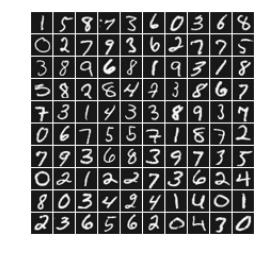

In [34]:

def displayData(X, example_width = 0):
    """
    2D 데이터를 그리드 형식에 표시한다. 
    이 함수는 X에 저장된 2D 데이터를 그리드에 표시한다. 그것은
    그림에 대한 핸들 h와 요청된 배열을 반환한다.
    """
    
    # example_width를 설정한다.
    if example_width == 0:
        example_width = round(np.sqrt(X.shape[1]))
    
    # Gray Image
    # colormap(gray); # In Octave code
    
    # rows, cols 수를 계산한다.
    m, n = X.shape
    example_height = (n / example_width)
    #m = 100, n = 400
    #print('m = %s, n = %s' % (m, n))
    
    example_width = int(example_width)
    example_height = int(example_height)
    #width = 20, height = 20
    #print('width = %s, height = %s' % (example_width, example_height))
    
    # 그려질 item의 갯수를 계산한다.
    display_rows = floor(np.sqrt(m))
    display_cols = ceil(m / display_rows)
    #rows = 10.0, cols = 10.0
    #print('rows = %s, cols = %s' % (display_rows, display_cols))  
    
    # 이미지 사이의 패딩을 설정한다.
    pad = 1
    
    # 비어있는 디스플레이를 설정한다. (211, 211)
    display_array = np.ones((pad + display_rows * (example_height + pad), 
                           pad + display_cols * (example_width + pad)))
    
    # 1 + 100 * (20 + 1)
    #print(display_array.shape)
    
    # 각각의 example을 display array상으로 복사한다.
    # ***************************************************************************
    # XXX: np.arange가 정수를 반환하도록 index 부분은 dtype=int를 주도록 한다.
    # ***************************************************************************
    curr_ex = 0
    for j in np.arange(display_rows, dtype=int):
        for i in np.arange(display_cols, dtype=int):
            if curr_ex >= m:
                break;
                
            # Copy the patch
            
            # Get the max value of the patch
            max_val = np.max(np.abs(X[curr_ex, :]))

            # python에서 인덱스는 0부터 시작한다. (j - 1) => j, (i - 1) => i
            #x = pad + j * (example_height + pad) + np.arange(example_height, dtype=int)
            #y = pad + i * (example_width + pad) + np.arange(example_width, dtype=int)

            x = pad + j * (example_height + pad)
            y = pad + i * (example_width + pad)
            
            #print('x = %s, y = %s' % (x, y))
            #print(display_array[x: x + example_height, y:y + example_width].shape)
            
            # 이미지를 올바르게 보이기 위해서 reshape 후에 transpose 시킨다.
            display_array[x:x + example_height, y: y + example_width] = \
                X[curr_ex, :].reshape((example_height, example_width)).T / max_val;

            curr_ex = curr_ex + 1
            
            if curr_ex >= m:
                break

    # ********************************************************
    # XXX: Ocatave의 imagesc() 는 imshow()로 대체가 가능하다.
    # ********************************************************
    # x, y축의 범위를 -1~1로 설정한다.
    #im = imshow(display_array, interpolation = 'bilinear', 
    #            origin = 'upper', 
    #            extent=(-1,1,-1,1))
    plt.set_cmap('gray')
    im = imshow(display_array)

    # 축을 보여주지 않는다.
    plt.axis('off')
    #show()
    
displayData(sel)


### 1.3 Verctorizing Logistic Resgression

**multi-class classifier를 구축하기 위해서 다중 one-vs-all logistic regression model들을 사용해야 한다.** **10개의 클래스가 있기 때문에 10개의 분리된 logistic regression classifier를 훈련시킬 필요가 있다.**

이 트레이닝을 **효율적으로 만들기 위해서 코드가 벡터화되는 것이 중요하다.** 이번 섹션에서는 **어떤 for loop 도 사용하지 않는 logistic regression의 벡터화 버전을 구현하게 될것이다.** 이번 연습문제를 위해서 마지막 연습문제의 코드를 시작 지점으로 사용할 수 있다.

#### 1.3.1 Vectorizing the cost function

cost 함수의 벡터화 버전을 작성하는 것으로 시작한다.  (unregularized) logistic regression에서 cost function은 다음과 같음을 기억해라.

[수식]

합 계산에서 각 요소를 계산하기 위해서, 우리는 각 example i에 대해서 $ h_{\theta}(x^{(i)}) $ 를 계산해야 한다. 여기서 $ h_{\theta}(x^{(i)}) = g(\theta^{T}x^{(i)}) $ 이고 $ g(z) = \frac{1}{1 + e^{-z}} $ 은 sigmoid 함수가 된다. 그것은 곧 우리가 행렬 곱셈을 사용해서 우리의 examples를 재빠르게 모두 계산할 수 있음을 나타낸다. X와 theta를 다음과 같이 정의하자.

[수식]

그러면, 행렬 곱 $ X\theta $ 을 계산해서, 우리는

[수식]

마지막 방정식에서, 우리는 만약 a와 b가 모두 벡터라면 $ a^{T}b = b^{T}a $ 라는 사실을 사용했다.

당신은 lrCostFunction.m 에서 unregularized cost 함수를 작성한다. 당신의 구현은 우리가 위에서 제시한 전략을 사용해서 $ \theta^{T}x^{(i)} $ 를 계산한다. cost 함수의 나머지 부분들도 벡터화된 접근법을 사용해야 한다. lrCostFunction.m의 완전한 벡터화 버전은 어떤 loop도 포함하지 않는다. 

(힌트: 요소곱 연산과 sum 연산을 사용할 수 있다)

#### 1.3.2 Vectorizing the gradient

(unregularized) logistic regression cost의 gradient가 벡터인데 여기서 j-번째 요소는 다음과 같이 정의됨을 기억해라.

[수식]

이 연산을 데이터셋에 대해서 벡터화하기 위해서는, 우리는 모든 $ \theta_{j}$ 에 대해서 모든 편미분 값을 작성한다.

[수식]

여기서

[수식]

$ x^{(i)} $는 벡터이고, 반면에 $ (h_{\theta}(x^{(i)}) - y^{(i)}) $ 는 스칼라 (단일한 숫자) 임을 주목해라. 유도의 마지막 단계를 이해하기 위해, $ \beta_{i} = (h_{\theta}(x^{(i)}) - y^{(i)}) $ 라고 하면, 다음을 관찰할 수 있다.

[수식]

여기서 값은 $ \beta_{i} = (h_{\theta}(x^{(i)}) - y^{(i)}) $ 가 된다.

위의 표현은 우리가 어떤 루프도 없이 모든 편미분 값을 계산할 수 있도록 해준다. 만약 당신이 선형대수학에 익숙하다면, 벡터화된 버전이 동일한 계산을 함을 위의 행렬 곱셈을 통해서 스스로 납득할 수 있을 것이다.

Debugging Tip: 벡터화 코드는 때로는 다루기 힘들 수 있다. **디버깅하기 위한 한가지 공통 전략은 행렬의 사이즈를 출력하는 것이다.** 예를 들어 주어진 행렬 X가 100x20 크기(100개의 example, 20개의 feature) 그리고 theta (20x1 dimension)이 있을 때, X*theta는 올바른 연산이지만, theta*X는 그렇지 않다. 뿐만 아니라, 당신이 만약 **비벡터화된 코드를 가지고 있다면 벡터화된 코드의 출력값과 비교해서 같은 출력값인지 확인해볼 수 있다.**

#### 1.3.3 Vectorizing regularized logistic regression

logistic regression에 대한 벡터화를 구현한 이후에는, cost function에 regularization을 추가해야 한다. regularized logistic regression 에 대해서, cost function은 다음과 같이 정의된다.

[수식]

**bias 항목으로 사용되는 theta0는 regularizing 해서는 안됨을 주목해라.**

거기에 맞춰서, $ \theta_{j} $ 에 대한 regularized logistic regression cost의 편미분은 다음과 같이 정의된다.

[수식]

이제 lrCostFunction내의 코드를 수정해서 regularization을 설명해라. 
다시 한번, 당신의 코드에는 어떤 loop도 있으면 안된다. 

Octave/MATLAB Tip: 
regularized logistic regression에 대한 벡터화를 구현할 때, theta의 특정 요소를 업데이트하고 합하기 만을 종종 원할 수 있다. Octave/MATLAB에서, 특정 요소를 업데이트 하고 접근하기 위해 행렬에 대한 인덱스를 사용할 수 있다.

예를 들어, A(:, 3:5) = B(:, 1:3)을 하면 A의 컬럼 3~5를 B의 컬럼 1~3으로 대치한다. (역주: 물론, python에서는 B의 1~2를 A의 3~4로 대치한다.) 인덱싱에서 사용할 수 있는 한가지 특별한 키워드는 end 이다. 이것은 우리가 행렬의 끝 부분까지 컬럼(또는 행)을 선택할 수 있게 해준다. 예를 들어 A(:, 2:end) 하면 A의 2번째에서 마지막 컬럼까지 반환한다. (역주: 물론, python 에서는 A[:, 1:] 라고 쓰면 된다.) 이렇게, 당신이 관심있어 하는  요소들에 대한 합을 계산하기 위해서 sum과 .^ 연산을 함께 사용할 수 있다. (예를 들어, sum(z(2:end).^2)). **lrCostFunction.m의 시작코드에서 우리는 또한 regularized gradient를 계산하는 또 다른 가능한 방법에 대한 힌트를 제공한다.**

_You should now submit your solutions._


In [6]:
def sigmoid(z):
    """
    큰 양의 값에 대해서는 결과값이 1에 가깝고, 
    큰 음수의 값에 대해서는 0에 가깝다.
    simoid(0) = 0.5
    """
    g = 1 / (1  + np.exp(-z))
    
    return g

print('sigmoid(10) = %s, sigmoid(-10) = %s, sigmoid(0) = %s' 
      % (sigmoid(10), sigmoid(-10), sigmoid(0)))

sigmoid(10) = 0.999954602131, sigmoid(-10) = 4.53978687024e-05, sigmoid(0) = 0.5


In [13]:
## ============ Part 2: Vectorize Logistic Regression ============
# 연습문제 이 부분에서, 당신은 마지막 연습문제의 logistic regression code를
# 재사용하게 될 것이다. 여기에서 당신의 작업은 당신의 regularized logistic
# regression 구현이 벡터화됨을 확인하는 것이다. 그렇게 하고난 후, 당신은
# 필기체 숫자 데이터셋에 대한 one-vs-all classification을 구현한다.

def lrCostFunction(theta, X, y, s_lambda):
    """
    regularization을 가진 logistic regression 의 cost와 gradient를 계산한다.
    이 함수는 regularzied logistic regression에 대한 파라미터로 theta를 사용해서
    cost를 계산하고 파라미터와 관련된 cost의 gradient를 계산한다.
    """
    
    m, n = X.shape
    #m = np.size(y) # training examples 갯수
    
    # 아래 값을 올바르게 반환해야 한다.
    J = 0
    grad = np.zeros(np.size(theta))
    

    # ====================== YOUR CODE HERE ======================
    """
    특정 theta에 대한 cost를 계산한다.
    cost는 J 값으로 설정한다. 
    theta에 있는 각 파라미터에 관련된 cost의 편미분값을 grad에 설정한다.
    
    힌트: cost 함수와 gradient 계산은 효율적으로 벡터화될 수 있다. 예를 들어 다음
    계산을 생각해보자. 
    
    sigmoid(X * theta)
    
    결과 행렬의 각 row는 해당 example의 예측값을 포함한다. 당신은 cost function과
    gradient 계산을 벡터화하기 위해 이와 같은 사용을 해야 한다.
    
    힌트: regularized cost 함수의 gradient를 계산할 때, 많은 벡터화 솔루션이 있지만
    한가지 가능한 방법은 아래와 같다
    
    grad = (unregularized gradient for logistic regression)
    temp = theta; 
    temp(1) = 0;   % because we don't add anything for j = 0  
    grad = grad + YOUR_CODE_HERE (using the temp variable)
 
    """

    
    # sum_theta_square는 theta[0]를 포함하지 않는다. 
    sum_theta_square = np.sum(theta[1:] ** 2)
    
    # 예측값을 계산한다.
    X_theta = X.dot(theta)
    prediction = sigmoid(X_theta)

    # cost J를 계산한다.
    J = 1/m * np.sum(-y * log(prediction) - (1 - y) * log(1 - prediction)) \
        + s_lambda / (2 * m) * sum_theta_square
        
    # 편미분을 계산한다.
    error = prediction - y
    delta = 1/m * error.T.dot(X)
    
    temp = theta
    temp[0] = 0
    regular = (s_lambda / m) * temp
    
    grad = delta + regular
    
    return J, grad
    

# TEST CASE
theta1 = np.array([-2, -1, 1, 2]);
#X1 = [ones(3,1) magic(3)];
X1 = np.array([[1, 8, 1, 6],
    [1, 3, 5, 7],
    [1, 4, 9, 2]])
y1 = np.array([1, 0, 1])       # creates a logical array
y2 = (y1 >= 0.5)
# *****************************************************************************
# XXX: np.array 끼리 비교 시 True/False 를 1/0 으로 매핑하기: x.astype(int)
# *****************************************************************************
print(y2.astype(int))
s_lambda1 = 3
J, grad = lrCostFunction(theta1, X1, y2.astype(int), s_lambda1)
#J, grad = lrCostFunction(theta1, X1, y1, s_lambda1)
print(J, grad)

"""
% output:
J = 7.6832
grad =
   0.31722
   -0.12768
   2.64812
   4.23787
"""
print()

[1 0 1]
7.68316654981 [ 0.31722075 -0.12768456  2.6481235   4.23787228]



## 1.4 One-vs-all Classification

여기에서는 multiple regularized logistic regression classifier를 트레이닝 해서 데이터셋 내의 K class 각각에 대한 one-vs-all 분류를 구현하게 될것이다(Figure 1). 필기체 숫자 이미지의 K=10 이지만, 코드는 어떤 K에 대해서도 동작해야 한다.

당시은 oneVsAll.m의 코드를 완성해서 각각의 클래스에 대해 하나의 classifier를 훈련시킨다. 특별히, 당신의 코드는 **모든 classifier 파라미터를 리턴해야 하는데 형태는 행렬 $ \Theta \in R^{Kx(N+1)} $이 된다. 여기서 $ \Theta $의 각 행은 하나의 클래스에 대한 학습된 logistic regression parameters가 된다.** 각각의 classifier를 독립적으로 훈련시키기 위해서 1에서 K까지 for-loop를 작성할 수 있다.

이 함수에 대한 y 인자는 1에서 10까지의 라벨로 구성된 벡터이며 숫자 "0"은 라벨 10에 매핑되었다. (인덱싱에 대한 혼란을 피하기 위해서)

class k에 대해서 분류기를 훈련시킬 때, 라벨 y는 m dimensional 벡터가 되는데, j번째가 1이면 해당 클래스 k에 속하고 0이면 해당 클래스가 아님을 나타낸다. 당신은 아마도 이 작업에 대해서 논리적인 배열 연산자를 찾을 수 있을 것이다.

Octave/MATLAB Tip: Octave/MATLAB의 논리 배열은 바이너리 (0 또는 1) 요소를 포함하는 배열이다. Octave/MATLAB 에서, 벡터 a (크기 m x 1)과 스칼라 b에 대해 표현 a == b를 평가하는 것은 a와 동일한 사이즈의 벡터를 반환하는데 a의 요소와 b가 같으면 1을 다르면 0을 반환한다. 이것이 어떻게 동작하는지 보기 위해서, Octave/MATLAB에서 다음 코드를 시도해 보아라.

```
a = 1:10; % Create a and b
b = 3;
a == b    % You should try different values of b here
```

**여기서는 fmincfg(fminunc 대신에)를 사용하는데, fminunc와 유사하게 동작하지만, 많은 수의 파라미터를 다루는데 더욱 효율적이다.**

oneVsAll.m에 대한 코드를 올바르게 완성한 이후에, 스크립트 ex3.m은 oneVsAll 함수를 사용해서 multi-class classifier를 훈련시킬 것이다.

_You should now submit your solutions._

In [21]:

## ============ Part 2: Vectorize Logistic Regression ============
# 연습문제 이 부분에서, 당신은 마지막 연습문제의 logistic regression code를
# 재사용하게 될 것이다. 여기에서 당신의 작업은 당신의 regularized logistic
# regression 구현이 벡터화됨을 확인하는 것이다. 그렇게 하고난 후, 당신은
# 필기체 숫자 데이터셋에 대한 one-vs-all classification을 구현한다.


import scipy.optimize as op

def oneVsAll(X, y, num_labels, s_lambda):
    """
    다중 logistic regression classifiers를 훈련시키고 행렬 all_theta
    에 모든 classifier를 담아 반환한다. 여기서 all_theta의  i-번째 행은
    라벨 i에 대한 classifier에 일치한다.
    
    이 함수는 num_labes logistic regression classifiers를 훈련시키고 이들
    classifiers 각각을 행렬 all_theta에 반환한다. 여기서 all_theta의 i-번째
    행은 라벨 i에 대한 classifier와 일치한다.
    """

    # 몇 가지 유용한 변수들
    m, n = X.shape
    
    # 다음 변수값을 올바르게 반환해야 한다.
    all_theta = np.zeros((num_labels, n + 1))
    
    # 1을 X 행렬에 컬럼벡터로 추가한다.
    X = hstack((np.ones((m, 1)), X))
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 다음 코드를 완성해서 regularization 파라미터 lambda를 갖는
    # num_labls logistic regression classifier를 훈련시켜야 한다.
    #
    # Hint: theta(:) 는 컬럼 벡터를 반환한다.
    #
    # Hint: y == c를 사용해서 1과 0의 벡터를 얻는데, ground truth가
    # 이 클래스에 대해서 true/false인지를 알려준다.
    # 
    # Note: 이 과제를 위해서, 우리는 fmincg를 사용해서 cost function을 
    # 최적화 할것을 제안한다. for-loop (for c = 1:num_lables)를 서로 다른 클래스에
    # 대해서 loop 하는 것도 좋다.
    #
    # fmincg 는 fimnunc와 유사하게 동작하지만, 우리가 더 많은 파라미터를 다룰때 더욱
    # 효율적이다.
    
    costFunc = lambda p: lrCostFunction(p, X, y2.astype(int), s_lambda)[0]
    gradFunc = lambda p: lrCostFunction(p, X, y2.astype(int), s_lambda)[1]
    
    # c: 0~9
    for c in np.arange(num_labels):
        c = c + 1 # 1부터 시작한다.
        initial_theta = np.zeros(n + 1)
        
        # 각 class 에 대한 분류기의 theta 정보는 row 형태로 저장된다.
        
        # *****************************************************************************
        # XXX: octave 에서는 (y == c) 의 결과는 1 0 0 1 등의 숫자로 나타난다.
        # python에서도 비슷하게 만드려면 y2 = (y == c); y2.astype(int) 를 해주고
        # array 타입으로 전달한다. (y == c) 는 [True False False True]의 결과이다.
        # *****************************************************************************
        y2 = (y == c)

        # 방식1) OK, (50회, 5.39 sec), (100회, 11.5 sec)
        # -------------------------------------------
        #theta = op.fmin_cg(myCost, fprime=myGradient,
        #    x0=initial_theta, args=(X, y2.astype(int), s_lambda), maxiter=50)
        
        #all_theta[c - 1, :] = theta
        
        # 방식2) OK, 5.41 sec 
        # -------------------
        #Result = op.minimize(fun = myCost, x0 = initial_theta, args = (X, y2.astype(int), s_lambda), \
        #             method = 'CG', jac = myGradient, options = {'maxiter': 50});
        #all_theta[c - 1, :] = Result.x
        
        # 방식3) OK,
        # maxiter가 400일때 오히려 training set accuracy가 93% 대로 더 떨어진다. 왜 그럴까?
        # ---------------
        Result = op.minimize(fun = costFunc, x0 = initial_theta, \
                     method = 'CG', jac = gradFunc, options = {'maxiter': 50});
        all_theta[c - 1, :] = Result.x
        
        
        # cost 를 출력한다.
        #print(Result.fun)
        
    return all_theta


s_lambda = 0.1
all_theta = oneVsAll(X, y, num_labels, s_lambda) # 5.51 sec

print(all_theta[0, 0:5])

"""
In Octave/MATLAB
ans =

  -3.14365   0.00000   0.00000   0.00008  -0.00072
"""
print()

[ -2.45142273e+00   0.00000000e+00   0.00000000e+00   3.29691786e-05
  -3.03981236e-04]



### 1.4.1 One-vs-all Prediction

one-vs-all 분류기를 훈련시킨 이후에는 주어진 이미지에 포함된 숫자를 예측하기 위해 분류기를 사용할 수 있다. **각각의 입력에 대해서 당신은 이미지가 훈련된 logistic regression classifiers를 사용해서 각 클래스에 포함될 "확률"을 계산해야 한다.**

**당신의 one-vs-all 예측 함수는 가장 높은 확률을 가진 클래스를 골라서 입력 example에 대한 예측으로 class label (1, 2, ... K)을 반환한다.**

이제 당시은 predictOneVsAll.m 코드를 완성해야 한다. 일단, 마무리 되면, ex3.m 은 학습된 파라미터 $ \Theta $를 가지고 predictOneVsAll 함수를 호출할 것이다. training set 정확도는 약 94.9% 임을 볼 수 있어야 한다. (즉, 분류기는 트레이닝 셋의 94.9% 를 올바르게 분류한다.)

_You should now submit your solutions._

In [22]:
## ================ Part 3: Predict for One-Vs-All ================
# 이후에...

def predictOneVsAll(all_theta, X):
    """
    훈련된 one-vs-all 분류기를 이용해서 label을 예측한다. labels은 1..K 범위이다.
    여기서 K = size(all_theta, 1) 이다. 
    p = predctonevsall(all_theta, X)는 행렬 X내에 있는 각각의 example에 대해서 
    예측 벡터를 반환할 것이다. X는 example을 row 형식으로 포함하고 있음을 주목해라.
    all_theta는 행렬인데 i번째 row는 i번째 클래스에 대한 훈련된 logistic regression theta 
    벡터가 된다. 당신은 p의 값을 1..K사의의 벡터로 설정해야 한다. (예를 들어, 
    p = [1; 3; 1; 2] 는 4개의 examples에 대해서 1, 3, 1, 2의 클래스를 예측한다.)    
    """
    
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    
    # 다음 변수를 올바르게 반환할 필요가 있다.
    p = np.zeros(m)

    # 1을 행렬 X에 추가한다.
    X = hstack((np.ones((m, 1)), X))
    
    # ====================== YOUR CODE HERE ======================
    """
    지시사항: 당신의 학습된 logistic regression 파라미터 (one-vs-all) 를 이용해서
    예측을 할 수 있도록 다음 코드를 완성해라.
    p 값은 예측 벡터의 하나로 설정되어야 한다. (1에서 num_labels까지)
    
    힌트: 이 코드는 max 함수를 이용해서 모두 벡터화로 처리될 수 있다.
    특히, max 함수는 최대값 요소의 index를 반환한다. 만약 examples가 row로 저장되어 있다면
    max(A, [], 2) 는 각 row에 대해서 최대값을 구할 수 있다.
    """
    
    # X * theta.T 로 예측값을 계산한다.
    prediction = sigmoid(X.dot(all_theta.T))
    
    # argmax(): 최대값의 인덱스 정보를 반환한다.
    # y = 10 10 (10 => 숫자 "0"이라는 의미)
    # p = 9 9 
    # axis = 1: 행에서 최대값의 위치를 찾는다.
    p = np.argmax(prediction, axis=1)
    p = p + 1

    return p
    
    
pred = predictOneVsAll(all_theta, X)

# In Octave: Training Set Accuracy: 94.920000
print('Training set Accuracy: %s' % mean(double(pred == y) * 100))



Training set Accuracy: 94.6


## 2. Neural Networks

이전 연습문제에서 필기체 숫자를 인식하기 위해 multi-class logistic regression을 구현했다. 하지만, **logistic regression은 그것 자체가 선형 분류기 이기 때문에 더욱 복잡한 가설 함수를 구성할 수 없다.** (각주 3: **(polynomial features와 같은) 더 많은 feature를 logistic regression에 추가할 수 있지만, 학습하는데 비용이 매우 비싸다**)

이번 연습문제에서는 **이전과 동일한 트레이닝 셋을 사용해서 필기체 숫자를 인식하기 위해 neural network를 구현할 것이다.** **neural network는 비선형 가설을 형성하는 복잡한 모델 표현이 가능하다.** 이번주에는 우리가 이미 훈련시킨 neural network에서 파라미터를 사용할 것이다. 목표는 예측을 위한 가중치를 사용해서 **feedforward propagation algorithm을 구현하는** 것이다. 다음주 연습문제에서는 neural network 파라미터를 학습하기 위해서 backpropagation algorithm을 작성할 것이다.

제공된 스크립트는 ex3_nn.m 이다.

### 2.1 Model representation

우리의 neural network가 그림 2에서 보여진다. **3개의 layer를 가지고 있는데, input layer, hidden layer 그리고 output layer로 구성된다.** 우리의 입력이 디지털 이미지의 픽셀 값임을 기억해라. 이미지는 사이즈가 20x20 이기 때문에 400개의 input layer 유닛이 필요하다. **(항상 +1을 출력하는 extra bias는 제외하고.)** 이전과 같이 트레이닝 데이터는 변수 X와 y에 로딩된다. 

당신은 이미 학습된 network parameters의 집합을 제공받는다($ \Theta^{(1)}, \Theta^{(2)} $). 이들 값은 ex3weights.m에 저장되어 있고 ex3_nn.m에 의해서 Theta1, Theta2로 로딩된다. **파라미터는 2번째 레이어의 25개 유닛과 10개의 output unit에 대해서 크기가 맞춰진 dimension을 가진다.**

```
% Load saved matrices from file
load('ex3weights.mat');
% The matrices Theta1 and Theta2 will now be in your Octave
% environment
% Theta1 has size 25 x 401
% Theta2 has size 10 x 26
```

[Figure 2: Neural network model.]


### 2.2 Feedforward Propagation and Prediction

이제 neural network를 위한 feedforward propagation을 구현할 것이다. 당신은 **neural network의 예측을 반환하는 predict.m 코드를 완성해야 한다.**

각각의 example i에 대해서 h(x)를 계산하고 관련된 예측을 반환하는 **feedforward 계산을 구현해야** 한다. one-vs-all 분류 전략과 비슷하게 **nueral network의 예측은 가장 큰 출력인 $ ( h_{\theta} (x) )_{k} $를 갖는 label이 될 것이다.**

Implementation Note: 행렬 X는 각각의 example를 row로 저장한다. predict.m 내의 코드를 완성시킬 때, __행렬에 1의 컬럼을 추가할__ 필요가 있다. __행렬 Theta1, Theta2는 각각의 unit에 대한 파라미터를 row로 저장하고 있다. 특히 Theta1의 첫번째 row는 두번째 layer의 첫번째 hidden unit에 일치한다.__ Octave/MATLAB에서 z(2) = T(1) * a(1)을 계산할 때, (그리고 만약 필요하다면, 전치해서) X를 올바르게 인덱스 해서 컬럼벡터로 a(l)을 얻어야 한다. 

일단 완료하면 ex3_nn.m은 Theta1, Theta2를 로딩해서 predict.m을 호출할 것이다. 정확도가 약 97.5%가 됨을 볼 수 있어야 한다. 그 이후에 트레이닝 셋에서 한번에 하나씩 이미지를 보여주고 콘솔은 이미지에 대한 예측된 라벨을 출력할 것이다. 이미지 출력을 중지하려면 Ctrl-C를 눌러라.

_You should now submit your solutions._


Loading and Visualizing Data ...


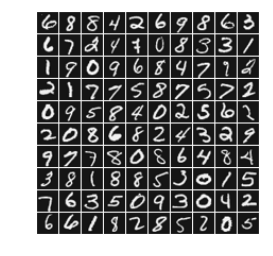

In [25]:
## Exercise 3 | Part 2: Neural Networks

# 지시사항
# -----------
# 당신은 이 연습문제에 있는 다음 함수를 완성시킬 필요가 있다.
# 
# 이 연습문제에 대해서, 이 파일에 있는 어떤 코드도 변경할 필요는 없고
# 위에 언급된 파일 이외에도 수정할 필요는 없다.

# 연습문제를 위해서 사용할 파라미터를 설정한다.
input_layer_size = 400 # 20x20 Input Images of Digits
hidden_layer_size = 25 # 25 hidden units
num_labels = 10 # 10 labels, from 1 to 10, 숫자 "0"은 label 10

## =========== Part 1: Loading and Visualizing Data =============
# 우리는 데이터셋을 로딩하고 가시화함으로써 연습문제를 시작한다.
# 당신은 필기체 숫자를 포함하는 데이터셋으로 작업하게 될 것이다.

# Load Training Data
print('Loading and Visualizing Data ...')

mat_content = sio.loadmat('ex3data1.mat')

X = mat_content['X']
y = mat_content['y']

y = y.ravel()

m = X.shape[0]

# 임의로 100개의 데이터를 선택해서 표시한다.
rand_indices = np.arange(m)
random.shuffle(rand_indices)

sel = X[rand_indices[0:100,], :] # 100x400

displayData(sel)

In [35]:
## ================ Part 2: Loading Pameters ================
# 연습문제 이 부분에서, 미리 초기화된 neural network parameters를 
# 로드한다.

print('Loading Saved Neural Network Parameters ...')

# 변수 Theta1과 Theta2로 가중치를 로드한다.
mat_content = sio.loadmat('ex3weights.mat')

Theta1 = mat_content['Theta1']
Theta2 = mat_content['Theta2']

Loading Saved Neural Network Parameters ...


In [36]:
## ================= Part 3: Implement Predict =================
# neural network를 트레이닝하고 난 후, label을 예측하기 위해 그것을 사용할 수 있다. 
# "predict" 함수를 구현해서 neural network를 이용해 트레이닝 셋의 라벨을 예측해본다. 
# 이것으로 트레이닝 셋에 대한 정확도를 계산할 수 있다.

def predict(Theta1, Theta2, X):
    """
    학습된 neural network에 주어진 입력의 label을 예측한다.
    이 함수는 neural network의 주어진 학습된 가중치로 X의 예측된 라벨을
    출력한다.
    
    p 는 주어진 neural network의 trained weights (Theta1, Theta2)로 행렬 X의
    예측된 label이 된다.
    """

    # 유용한 변수들
    m = X.shape[0] # m = 5000
    
    # 다음 변수를 올바르게 반환해야 한다.
    p = np.zeros(m)
    # p 는 1에서 num_labels 사이의 label이 된다.
    
    # ====================== YOUR CODE HERE ======================
    # 지시사항: 다음 코드를 완성해서 학습된 neural network를 사용한 예측을
    # 해보아라. 당신은 p를 1에서 num_labels 사이의 라벨을 포함한 벡터로 설정해야 한다.
    #
    # Hint: max 함수는 유용하게 된다. 특히, max 함수는 최대 요소의 인덱스를 또한
    # 반환할 수 있다. 더 자세한 정보는 'help max'로 보아라. 만약 당신의 examples가
    # 행으로 되어 있다면, max(A, [], 2)를 사용해서 각 행에 대한 최대값을 구할 수 있다.
    
    # 1컬럼을 X 행렬에 추가한다.
    X = np.hstack((np.ones((m, 1)), X))
    z = Theta1.dot(X.T)
    a2 = sigmoid(z) # 25x5000

    a2 = a2.T # 5000x25
    
    # 1컬럼을 a2 행렬에 추가한다.
    a2 = hstack((np.ones((a2.shape[0], 1)), a2))
    z = Theta2.dot(a2.T)
    a3 = sigmoid(z) # 10x5000
    
    # ************************************************
    # XXX: argmax(): 최대값의 인덱스 정보를 반환한다.
    # ************************************************
    # y = 10 10 (10 => 숫자 "0"이라는 의미)
    # p = 9 9 
    p = np.argmax(a3, axis=0)
    p = p + 1

    return p
    
    
pred = predict(Theta1, Theta2, X)

# In Octave: Training Set Accuracy: 97.520000
print('Training Set Accuracy: %s \n' % (mean(double(pred == y)) * 100))

Training Set Accuracy: 97.52 



Diplaying Example Image


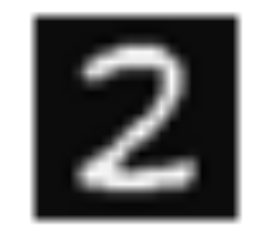

Neural Network Prediction: [2] (digit 2)
Diplaying Example Image


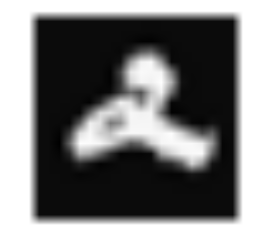

Neural Network Prediction: [2] (digit 2)
Diplaying Example Image


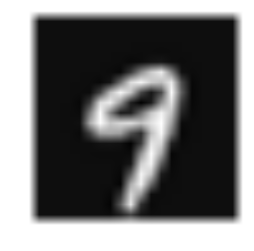

Neural Network Prediction: [9] (digit 9)
Diplaying Example Image


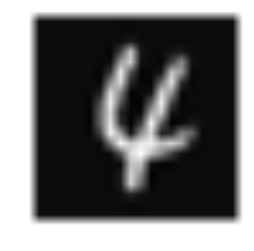

Neural Network Prediction: [4] (digit 4)
Diplaying Example Image


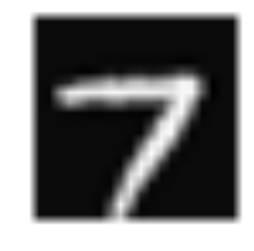

Neural Network Prediction: [7] (digit 7)
Diplaying Example Image


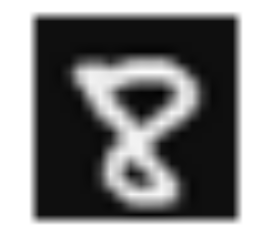

Neural Network Prediction: [8] (digit 8)
Diplaying Example Image


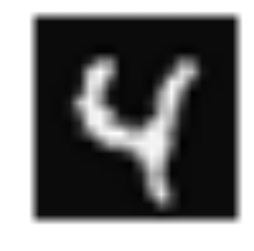

Neural Network Prediction: [4] (digit 4)
Diplaying Example Image


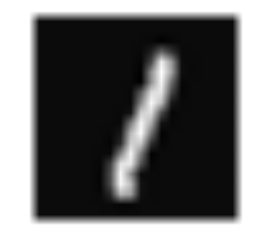

Neural Network Prediction: [1] (digit 1)
Diplaying Example Image


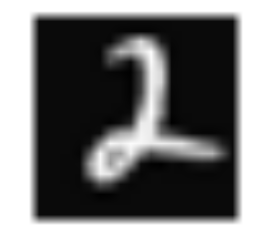

Neural Network Prediction: [2] (digit 2)
Diplaying Example Image


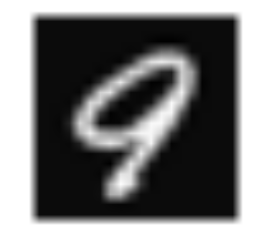

Neural Network Prediction: [9] (digit 9)


In [37]:
# network의 출력에 대한 아이디어를 제공하기 위해서, 
# 한번에 하나의 example을 실행해보고 무엇을 예측했는지 볼 수 있다.

# 무작위로 examples를 조합한다.
rand_indices = np.arange(m)
random.shuffle(rand_indices)

# 임의로 10개만 선택해서 보여준다.
for i in np.arange(10):
    # ******************************************************************
    # XXX: displayData(), predict() 함수는 X를 2차원 벡터로 입력받는다.
    # ******************************************************************
    idx = rand_indices[i]
    A = np.array([X[idx, :]])
    print('Diplaying Example Image')
    displayData(A)
    plt.show()
    
    pred = predict(Theta1, Theta2, A)
    print('Neural Network Prediction: %s (digit %s)' % (pred, y[idx]))

## The End